In [13]:
import os
from glob import glob

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Pairwise Intersections of Annotation Files

In [7]:
def only_names(file_list):
    "returns only names of files in a particular list"
    return [ann.split("/")[-1] for txt, ann in file_list]


ls = []
for a1, fs1 in annotated_data.items():
    for a2, fs2 in keep.items():
        if not a1 == a2:
            
            names1, names2 = only_names(fs1), only_names(fs2)
            inter = set(names1) & set(names2) #names of files are identical
            val = len(inter)/len(names1)
            
            total_names1 = only_names(tup for ls in results[a1] for tup in ls)
            total_names2 = only_names(tup for ls in results[a2] for tup in ls)
            
            total_inter = set(total_names1) & set(total_names2)
            total_val = len(total_inter)/len(total_names1)
    
            jacc_val = len(set(names1).intersection(set(names2)))/len(set(names1).union(set(names2)))
            jacc_val_2 = len(set(total_names1).intersection(set(total_names2)))/len(set(total_names1).union(set(total_names2)))
            
            
            
            ls.append([a1, a2, len(inter), val, 
                       len(total_inter), total_val, jacc_val, jacc_val_2])
            
            
inter_stats = pd.DataFrame(ls, 
                           columns=["Annotator1", "Annotator2", 
                                    "Intersection", "normed_Intersection",
                                   "total_Intersection", "total_normed_Intersection", "Jaccard_distance", "Jaccard_Distance_2"])

AttributeError: 'str' object has no attribute 'items'

In [11]:
# inter_stats

#### Jaccard Distance to Understand Overlap Pages between Annotators

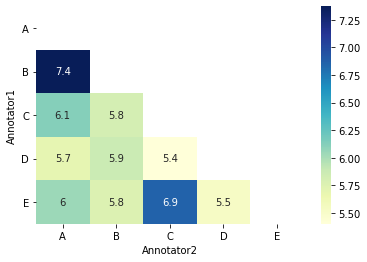

In [12]:
import numpy as np 
# inter_stats_T = inter_stats.pivot_table(
#                 values="Jaccard_distance",
#     index="Annotator1", columns="Annotator2"
# )

# sns.heatmap(inter_stats_T*100, annot=True, cmap="YlGnBu")
# _ = plt.title("Before Clean Up: Jaccard Distance (percentage)")

# plt.show()

inter_stats_T = inter_stats.pivot_table(
                values="Jaccard_Distance_2",
    index="Annotator1", columns="Annotator2"
)

matrix = np.triu(inter_stats_T)
sns.heatmap(inter_stats_T*100, annot=True, cmap="YlGnBu", mask=matrix)
_ = plt.title("")
plt.yticks(rotation=0) 
plt.savefig('AnnotationOverlap.png')
plt.show()


# inter_stats_T = inter_stats.pivot_table(
#                 values="Intersection",
#     index="Anno1", columns="Anno2"
# )

# sns.heatmap(inter_stats_T, 
#             annot=True, cmap="YlGnBu")

# _ = plt.title("Before Clean Up: Raw Counts")

**Conclusion**: Each pair of annotators annotated on average have 6% overlap (over the total documents they annotated together).

## Check Tag Distributions

In [13]:
def get_lines(ann_file):
    with open(ann_file) as handle:
        for l in handle:
            if not l.strip(): continue
            yield l.strip().split("\t")

def get_entities(ann_file):
    for line in get_lines(ann_file):
        if line[0].startswith("T") and len(line) >= 2:
            tag_type, tag, string = line
            yield tag.split()[0]


        
ents = {a: [e for txt, ann in files for e in get_entities(ann)]
       for a, files in keep.items()}

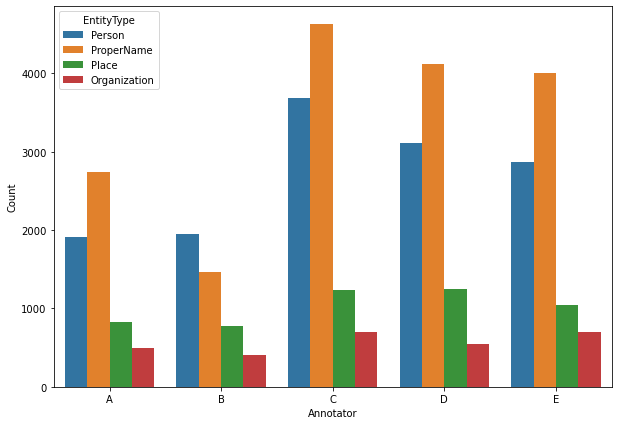

In [14]:
from collections import Counter

entity_stats = pd.DataFrame(
    [[a, e, c] for a in ents for e, c in Counter(ents[a]).items() if not e in ["DuplicatePage", "Noteworthy", "TranscriptionError_Document"]],
    columns=["Annotator", "EntityType", "Count"]
)



plt.figure(figsize=(10, 7))
_ = sns.barplot(data=entity_stats, x='Annotator', y="Count", hue="EntityType")

**Conclusion**: 
Here we see that most annotators follow a similar trend in entities annotated, only annotator who stands out is '3'.